<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>
<h3 style="text-align: center;"><b>Базовый и продвинутый потоки. Осень 2021</b></h3>
<h3 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h3>

На основе [курса по Машинному Обучению ФИВТ МФТИ](https://github.com/ml-mipt/ml-mipt) и [Открытого курса по Машинному Обучению](https://habr.com/ru/company/ods/blog/322626/).

---

### K Nearest Neighbors (KNN)

Метод ближайших соседей (k Nearest Neighbors, или kNN) — очень популярный метод классификации, также иногда используемый в задачах регрессии. Это один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей; какие преобладают --- таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных. 

<img src='https://hsto.org/web/68d/a45/6f0/68da456f00f8434e87628dbe7e3f54a7.png' width=600>

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки
* Отобрать объектов обучающей выборки, расстояние до которых минимально
* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

### Обработка данных

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке.

##### Columns description
- 0) Elevation
- 1) Aspect
- 2) Slope
- 3) Horz_Dist_Hydr 
- 4) Vert_Dist_Hydr 
- 5) Horz_Dist_Roadways 
- 6) Hillshade_9am 
- 7) Hillshade_Noon 
- 8) Hillshade_3pm 
- 9) Horz_Dist_Fire_Points 
- 10) Wilderness_Area (4 binary columns)
- 11) Soil_Type (40 binary columns)
- 12) Cover_Type (7 types)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt


latex = False
if latex:
    plt.rcParams['text.usetex'] = True
    plt.rcParams['text.latex.preambule'] = [r'\usepackage{amsmath}']
    plt.rcParams['text.latex.preambule'] = [r'\usepackage[utf8]{inputenc}']
    plt.rcParams['text.latex.preambule'] = [r'\usepackage[russian]{babel}']
    
    
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['image.cmap'] = 'Set1'
# plt.rcParams['figure.constrained_layout.use'] = True
# plt.rcParams['figure.constrained_layout.w_pad'] = 1
# plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.frameon'] = True
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.antialiased'] = True
plt.rcParams['lines.color'] = 'red'
plt.rcParams['svg.fonttype'] = 'none'


def set_size(ratio=0.618, scale=1):
    width = 15 * scale
    return (width, ratio*width)

In [3]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.rename(columns={"0": "elevation", 
                         "1": "aspect", 
                         "2": "slope", 
                         "3": "horz_hydr", 
                         "4": "vert_hydr", 
                         "5": "road_dist", 
                         "6": "hs_morn", 
                         "7": "hs_noon", 
                         "8": "hs_day", 
                         "9": "fire_dist", 
                         "54": "cover_type"}, inplace=True)


quantative_features = all_data[["elevation", "aspect", "slope", "horz_hydr", "vert_hydr", "road_dist", "fire_dist", "hs_morn", "hs_noon", "hs_day", "cover_type"]]
target = all_data["cover_type"]
quantative_features.head()

,elevation,aspect,slope,horz_hydr,vert_hydr,road_dist,fire_dist,hs_morn,hs_noon,hs_day,cover_type
0,2683,333,35,30,26,2743,6572,121,173,179,2
1,2915,90,8,216,11,4433,4019,232,228,129,1
2,2941,162,7,698,76,2783,1784,227,242,148,2
3,3096,60,17,170,3,3303,5370,231,202,99,1
4,2999,66,8,488,37,1532,2290,228,225,131,2


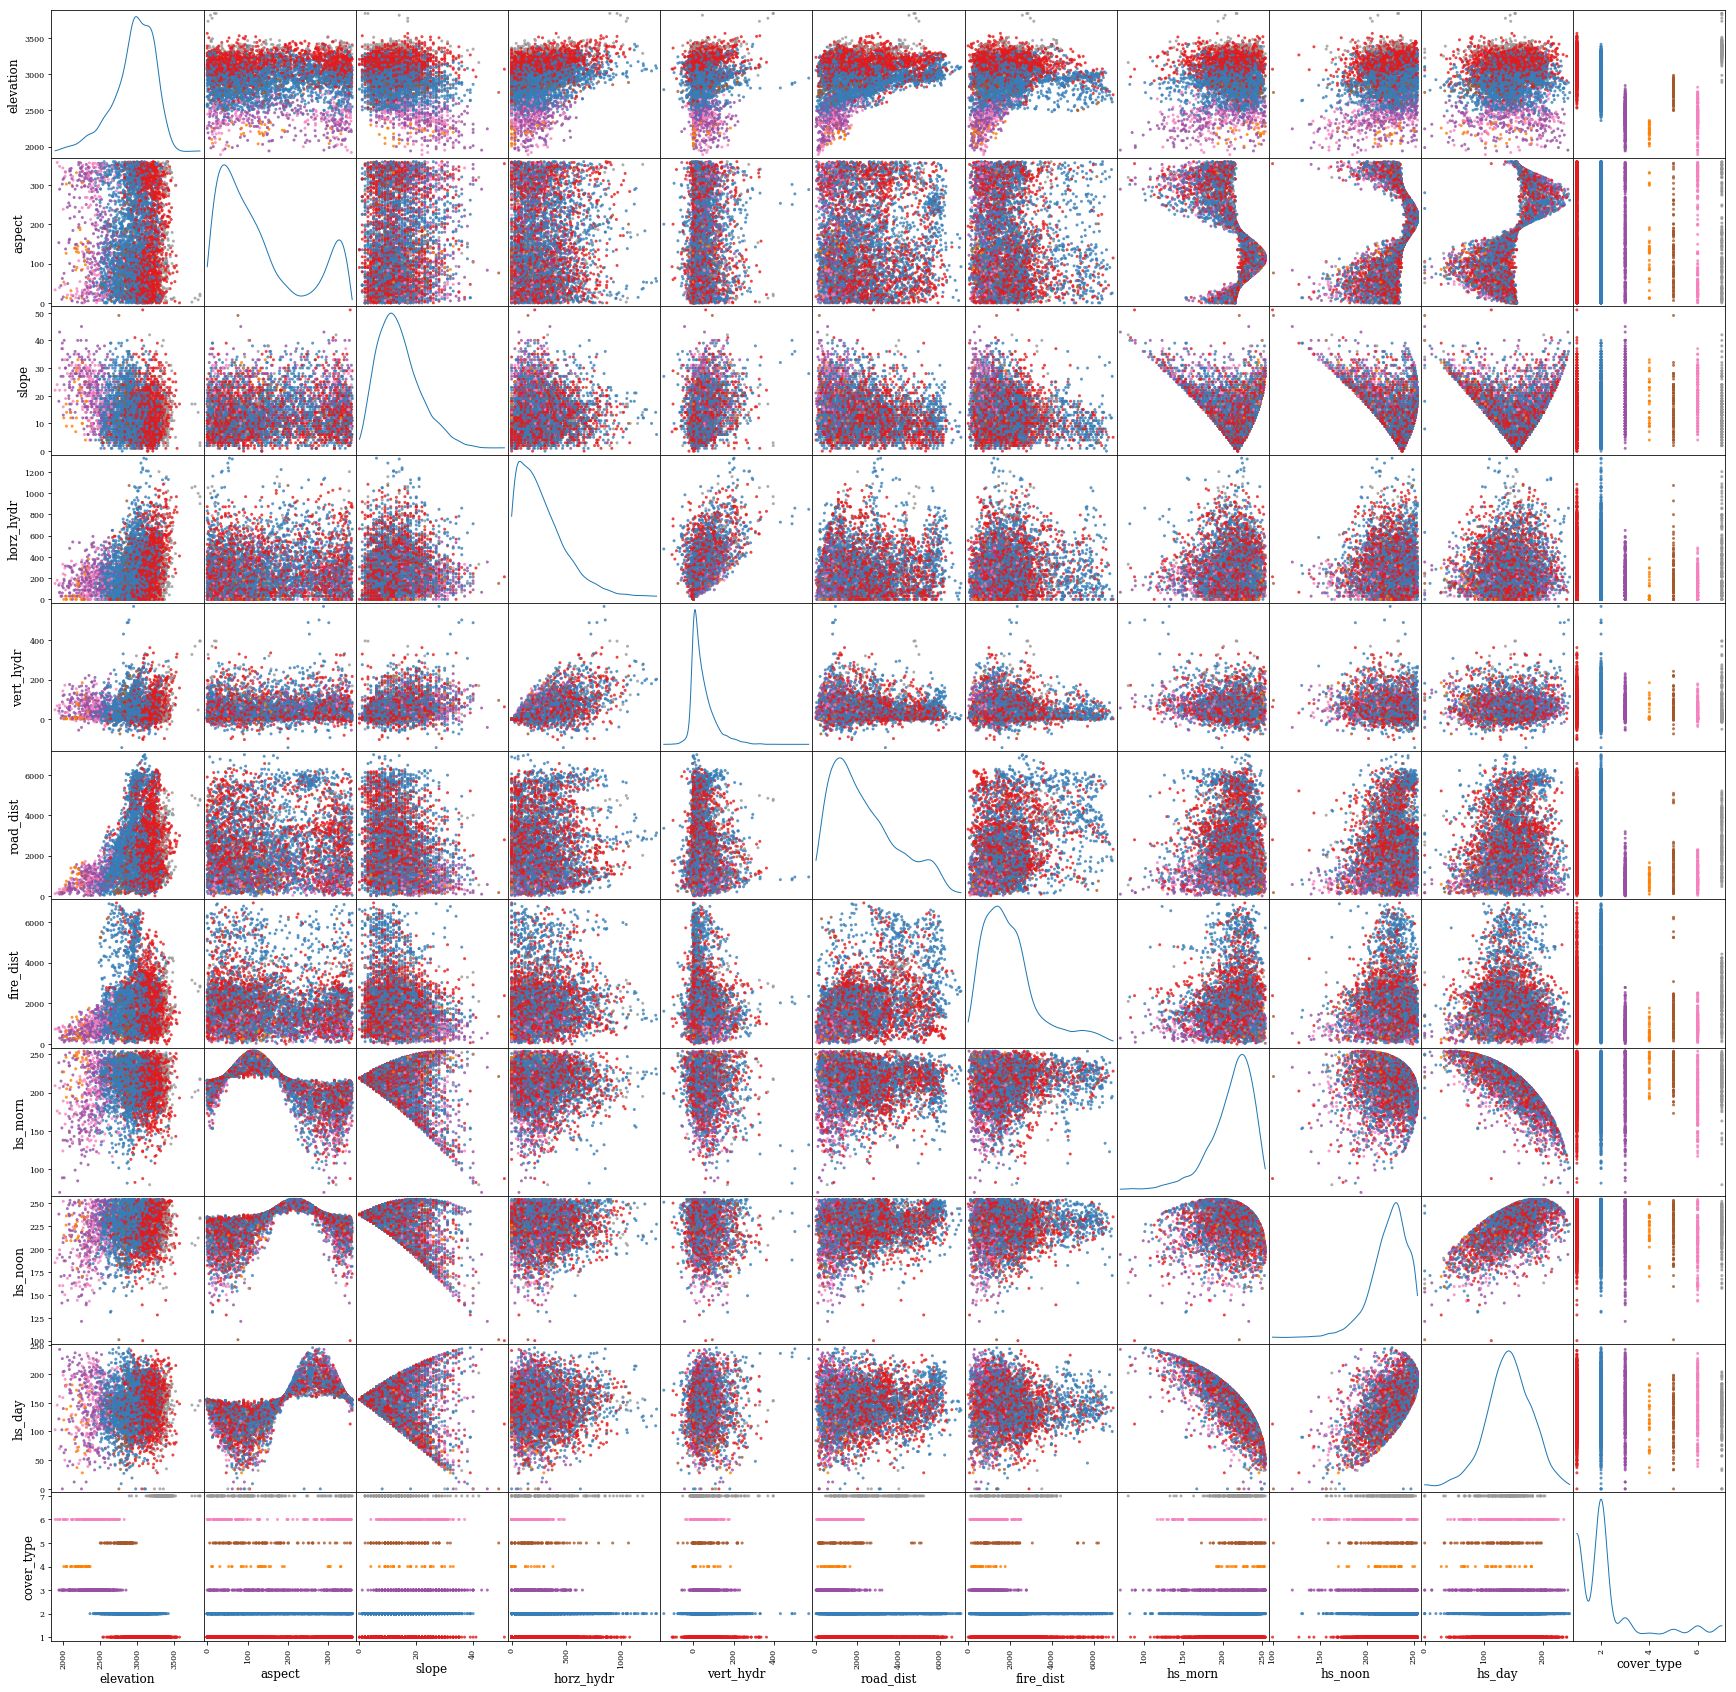

In [4]:
data = quantative_features.sample(5000)
pd.plotting.scatter_matrix(data, alpha=0.8, diagonal="kde", c=data["cover_type"], figsize=(30, 30));

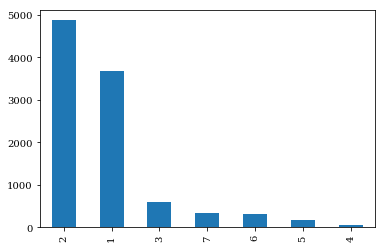

In [5]:
target.value_counts().plot.bar();

C:\Users\MIZaynullin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_tools.py:203: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)
C:\Users\MIZaynullin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:2254: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


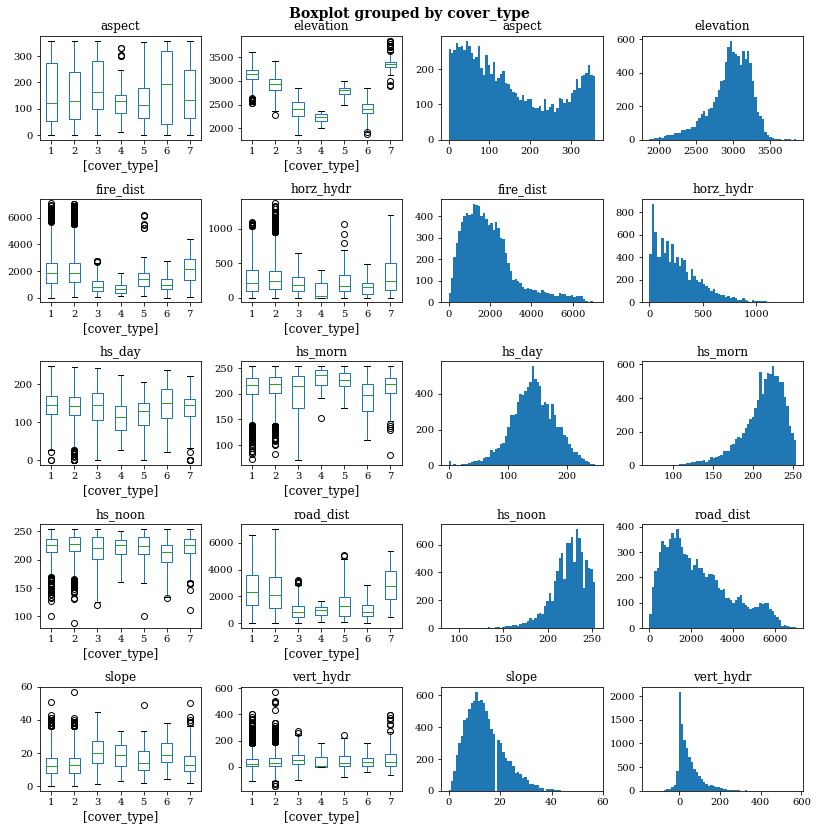

In [6]:
fig, axes = plt.subplots(5, 4, figsize=(12, 12))
quantative_features.boxplot(by="cover_type", grid=False,  whis=2, layout=(5, 2), ax=axes[:, :2])
quantative_features.drop(columns="cover_type").hist(bins=60, grid=False,  layout=(5, 2), ax=axes[:, 2:])
plt.tight_layout(pad=3, h_pad=1, w_pad=0);

In [7]:
quantative_features.describe(percentiles=[.01, .02, .1, .25, .50, .75, .90, .98, .99])

,elevation,aspect,slope,horz_hydr,vert_hydr,road_dist,fire_dist,hs_morn,hs_noon,hs_day,cover_type
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2960.645900,154.127600,13.98120,269.502800,45.596800,2358.805400,1982.005000,212.382200,223.886000,142.892300,2.034100
std,276.101899,111.112044,7.44313,214.741609,57.607363,1564.814207,1307.685368,26.560675,19.443395,37.460182,1.378016
min,1866.000000,0.000000,0.00000,0.000000,-147.000000,0.000000,0.000000,70.000000,88.000000,0.000000,1.000000
1%,2131.970000,1.000000,2.00000,0.000000,-43.010000,150.000000,180.000000,126.000000,163.000000,45.000000,1.000000
2%,2245.000000,4.000000,3.00000,0.000000,-26.000000,218.000000,268.000000,138.000000,173.000000,60.000000,1.000000
10%,2577.000000,23.000000,5.00000,30.000000,0.000000,598.000000,599.800000,177.000000,199.000000,97.000000,1.000000
25%,2819.000000,57.000000,9.00000,108.000000,6.000000,1106.750000,1041.000000,199.000000,213.000000,120.000000,1.000000
50%,2996.000000,128.000000,13.00000,218.000000,29.000000,2008.000000,1719.000000,218.000000,227.000000,143.000000,2.000000
75%,3162.000000,254.000000,18.00000,390.000000,68.000000,3330.250000,2542.250000,231.000000,238.000000,167.000000,2.000000


Выделим значения метки класса в переменную `labels`, признаковые описания -- в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`формат с помощью метода `.values`.

In [8]:
labels = all_data[all_data.columns[-1]].values.astype("float64")
feature_matrix = all_data[all_data.columns[:-1]].values.astype("float64")
print(feature_matrix.shape, labels.shape)

(10000, 54) (10000,)


### Пара слов о sklearn

**[sklearn](https://scikit-learn.org/stable/index.html)** -- удобная библиотека для знакомства с машинным обучением. В ней реализованны большинство стандартных алгоритмов для построения моделей и работ с выборками. У неё есть подробная документация на английском, с которой вам придётся поработать. `sklearn` предпологает, что ваши выборки имеют вид пар $(X, y)$, где $X$ -- матрица признаков, $y$ -- вектор истинных значений целевой переменной, или просто $X$, если целевые переменные неизвестны.

Познакомимся со вспомогательной функцией 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
С её помощью можно разбить выборку на обучающую и тестовую части. Вернёмся к датасету. Сейчас будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделим выборку на обучающую и тестовую с помощью метода `train_test_split`. Параметр `test_size` контролирует, какая часть выборки будет тестовой. Более подробно о нём можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [9]:
from sklearn.model_selection import train_test_split


train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

Основные объекты `sklearn` -- так называемые `estimators`, что можно перевести как *оценщики*, но не стоит, так как по сути это *модели*. Они делятся на **классификаторы** и **регрессоры**. В качестве примера модели можно привести классификаторы
[метод ближайших соседей](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) и 
[логистическую регрессию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Что такое логистическая регрессия и как она работает сейчас не важно. У всех моделей в `sklearn` обязательно должно быть хотя бы 2 метода (подробнее о методах и классах в python будет в следующих занятиях) -- `fit` и `predict`.

Метод `fit(X, y)` отвечает за обучение модели и принимает на вход обучающую выборку в виде *матрицы признаков* $X$ и *вектора ответов* $y$. У обученной после `fit` модели теперь можно вызывать метод `predict(X)`, который вернёт предсказания этой модели на всех объектах из матрицы $X$ в виде вектора. Вызывать `fit` у одной и той же модели можно несколько раз, каждый раз она будет обучаться заново на переданном наборе данных. Ещё у моделей есть *гиперпараметры*, которые обычно задаются при создании модели.

Рассмотрим всё это на примере логистической регрессии.

In [10]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(C=1)    
clf.fit(train_feature_matrix, train_labels)   
y_pred = clf.predict(test_feature_matrix)    

C:\Users\MIZaynullin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MIZaynullin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Теперь хотелось бы измерить качество нашей модели. Для этого можно использовать метод `score(X, y)`, который посчитает какую-то функцию ошибки на выборке $X, y$, но какую конкретно уже зависит от модели. Также можно использовать одну из функций модуля `metrics`, например [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), которая, как понятно из названия, вычислит нам точность предсказаний.

In [11]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, accuracy_score, balanced_accuracy_score, classification_report


print(accuracy_score(test_labels, y_pred), clf.score(test_feature_matrix, test_labels))

0.6985 0.6985


Наконец, последним, о чём хотелось бы упомянуть, будет перебор гиперпараметров по сетке. Так как у моделей есть много гиперпараметров, которые можно изменять, и от этих гиперпараметров существенно зависит качество модели, хотелось бы найти наилучшие в этом смысле параметры. Самый простой способ это сделать -- просто перебрать все возможные варианты в разумных пределах.

Сделать это можно с помощью класса [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), который осуществляет поиск (search) по сетке (grid) и вычисляет качество модели с помощью кросс-валидации (CV). У логистической регрессии, например, можно поменять параметры `C` и `penalty`. Сделаем это. Учтите, что поиск может занять долгое время. Смысл параметров смотрите в документации. Заметьте, что мы передаём в GridSearchCV всю выборку, а не только её обучающую часть. Это можно делать, так как поиск всё равно использует кроссвалидацию. Однако порой от выборки всё-же отделяют *валидационную* часть, так как гиперпараметры в процессе поиска могли переобучиться под выборку.

In [12]:
clf_default = LogisticRegression()
cross_validate(clf_default, feature_matrix, labels, cv=5, return_train_score=False, n_jobs=-1, verbose=10,
               scoring={"r2_score": make_scorer(r2_score), 
                        "mean_square_score": make_scorer(balanced_accuracy_score), 
                        "accuracy_score": make_scorer(accuracy_score),
                        "balanced_accuracy_score": make_scorer(balanced_accuracy_score),
                       })

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   10.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished


{'fit_time': array([3.72614479, 4.20176458, 4.0345552 , 4.1607604 , 1.29767585]),
 'score_time': array([0.15600467, 0.02400255, 0.06240225, 0.06100607, 0.03120089]),
 'test_r2_score': array([0.07334493, 0.09022705, 0.25655772, 0.15264985, 0.1476287 ]),
 'test_mean_square_score': array([0.42395357, 0.46082349, 0.43262806, 0.4607812 , 0.43796566]),
 'test_accuracy_score': array([0.70544184, 0.70114943, 0.71735868, 0.70235118, 0.71471471]),
 'test_balanced_accuracy_score': array([0.42395357, 0.46082349, 0.43262806, 0.4607812 , 0.43796566])}

In [ ]:
clf = LogisticRegression()
param_grid = {
            "C": [1, 2, 4, 8, 16],
            "penalty": ["l1", "l2"],
             }
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, verbose=10, scoring='accuracy', return_train_score=False)
search.fit(feature_matrix, labels);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min


In [ ]:
search.cv_results_

In [ ]:
labels_pred = search.best_estimator_.predict(feature_matrix)

print(search.best_estimator_, 
      search.best_params_, 
      search.best_score_,
      f"Accuracy {accuracy_score(labels, labels_pred):.4f}, \
        MSE {mean_squared_error(labels, labels_pred):.4f}, \
        R2 {r2_score(labels, labels_pred):.4f}", 
     classification_report(labels, labels_pred), 
     sep=f"\n{'-'*80}\n")

### Обучение модели

Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров:

* число соседей `n_neighbors`
* метрика расстояния между объектами `metric`
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос") `weights`

Обучите на датасете `KNeighborsClassifier` из `sklearn`.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Без нормировки**

In [21]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values.astype("float64")

train_matrix, test_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=4, p=1, weights="distance")
knn_clf.fit(train_matrix, train_labels)
pred_labels = knn_clf.predict(test_matrix)
print(accuracy_score(test_labels, pred_labels))

0.766


**MinMaxScaler нормировка**

In [42]:
pca = MinMaxScaler()
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values.astype("float64")

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)

pca.fit(train_feature_matrix)  # fit делаем на трейн части, чтобы не было лика из тест части датасета
train_feature_matrix = pca.transform(train_feature_matrix) # применяем fit и на трейн и на тест
test_feature_matrix = pca.transform(test_feature_matrix)

knn_clf = KNeighborsClassifier(n_neighbors=4, p=1, weights="distance")
knn_clf.fit(train_feature_matrix, train_labels)
pred_labels = knn_clf.predict(test_feature_matrix)
print(accuracy_score(test_labels, pred_labels))

0.7546666666666667


**StandardScaler нормировка**

In [43]:
pca = StandardScaler()
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values.astype("float64")


train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)

pca.fit(train_feature_matrix[:, :10])
train_feature_matrix[:, :10] = pca.transform(train_feature_matrix[:, :10])
test_feature_matrix[:, :10] = pca.transform(test_feature_matrix[:, :10])

knn_clf = KNeighborsClassifier(n_neighbors=4, p=1, weights="distance")
knn_clf.fit(train_feature_matrix, train_labels)
pred_labels = knn_clf.predict(test_feature_matrix)
print(accuracy_score(test_labels, pred_labels))

0.749


### Вопрос 1:
* Какое качество у вас получилось?

Подберём параметры нашей модели
* Переберите по сетке от `1` до `10` параметр числа соседей

* Также вы попробуйте использоввать различные метрики: `['manhattan', 'euclidean']`

* Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`

In [44]:
pca = MinMaxScaler()
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values.astype("float64")

feature_matrix = pca.fit_transform(feature_matrix)

params = {
    "n_neighbors": np.arange(2, 11),
    "p": [1, 2],
    "weights": ["uniform", "distance"],
}
knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
knn_grid_search.fit(feature_matrix, labels);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

In [45]:
# knn_grid_search.cv_results_
print(knn_grid_search.best_params_, knn_grid_search.best_score_, knn_grid_search.best_estimator_, sep=f"\n{'-'*80}\n")

{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
--------------------------------------------------------------------------------
0.7638
--------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')


In [46]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values.astype("float64")

params = {
    "n_neighbors": np.arange(2, 11),
    "p": [1, 2],
    "weights": ["uniform", "distance"],
}
knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)
knn_grid_search.fit(feature_matrix, labels);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

In [47]:
# knn_grid_search.cv_results_
print(knn_grid_search.best_params_, knn_grid_search.best_score_, knn_grid_search.best_estimator_, sep=f"\n{'-'*80}\n")

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
--------------------------------------------------------------------------------
0.7865
--------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=1,
           weights='distance')


### Вопрос 2:
* Какую metric следует использовать?

### Вопрос 3:
* Сколько n_neighbors следует использовать?

### Вопрос 4:
* Какой тип weights следует использовать?

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [91]:
optimal_clf = knn_grid_search.best_estimator_
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

0.06


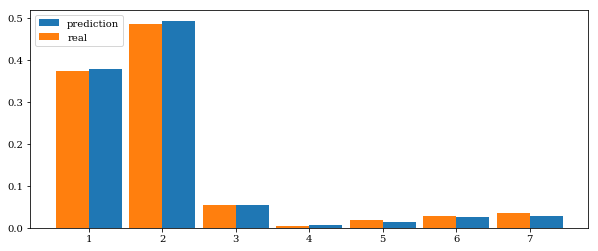

In [86]:
unique, counts = np.unique(test_labels, return_counts=True)
freq = counts / len(test_labels)
pred_freq = pred_prob.mean(axis=0)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(unique, pred_freq, width=0.45, align="edge", label='prediction')
ax.bar(unique, freq, width=-0.45, align="edge", label='real')
ax.legend()

print(pred_freq[2].round(2))

In [92]:
optimal_clf = knn_grid_search.best_estimator_
pca = StandardScaler()
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.3, random_state=42)

pca.fit(train_feature_matrix[:, :10])
train_feature_matrix[:, :10] = pca.transform(train_feature_matrix[:, :10])
test_feature_matrix[:, :10] = pca.transform(test_feature_matrix[:, :10])

optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

0.05


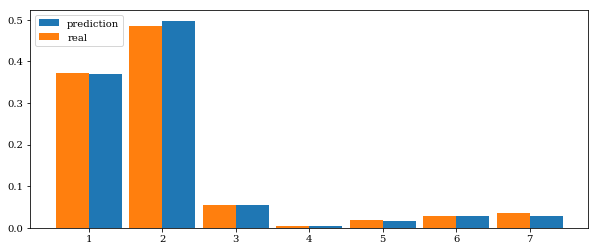

In [93]:
unique, counts = np.unique(test_labels, return_counts=True)
freq = counts / len(test_labels)
pred_freq = pred_prob.mean(axis=0)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(unique, pred_freq, width=0.45, align="edge", label='prediction')
ax.bar(unique, freq, width=-0.45, align="edge", label='real')
ax.legend()

print(pred_freq[2].round(2))

### Вопрос 5:
* Какая прогнозируемая вероятность pred_freq класса под номером 3 (до 2 знаков после запятой)?